In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split


In [6]:
df = pd.read_csv(r"C:\Users\dell\Desktop\SMSSpamCollection.txt",sep='\t',names=["label", "message"])

In [7]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.shape

(5572, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

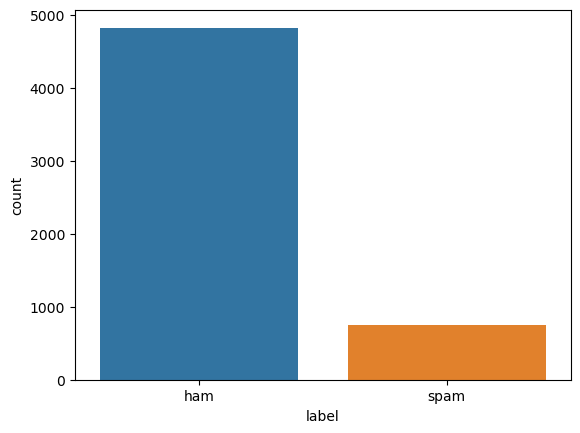

In [24]:
import seaborn as sns
sns.countplot(df['label'])

In [12]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [13]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [25]:
df['label'].value_counts().values

array([4825,  747], dtype=int64)

In [28]:
y = df['label'].map(
    {'spam' : 0,
    'ham' : 1
    }
)

In [30]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: label, Length: 5572, dtype: int64

In [31]:
wordnet = WordNetLemmatizer()

In [35]:
import re
corpus = []
for i in range(len(df)):
    rev = re.sub('[^a-zA-Z]', ' ',df['message'][i])
    rev = rev.lower()
    rev = rev.split()
    rev = [wordnet.lemmatize(word) for word in rev if word not in set(stopwords.words('english'))]
    rev = ' '.join(rev)
    corpus.append(rev)

In [38]:
len(corpus)

5572

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfi = TfidfVectorizer()
x = tfi.fit_transform(corpus).toarray()

In [42]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: label, Length: 5572, dtype: int64

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [46]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
y_train

5087    1
965     1
582     1
5128    1
2549    1
       ..
2174    1
5140    1
4126    1
1504    1
1191    1
Name: label, Length: 3900, dtype: int64

In [48]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [51]:
y_pred = model.predict(x_test)

In [52]:
model.score(x_train,y_train)

0.9743589743589743

In [53]:
model.score(x_test,y_test)

0.9683014354066986

In [56]:
from sklearn.metrics import confusion_matrix

In [58]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

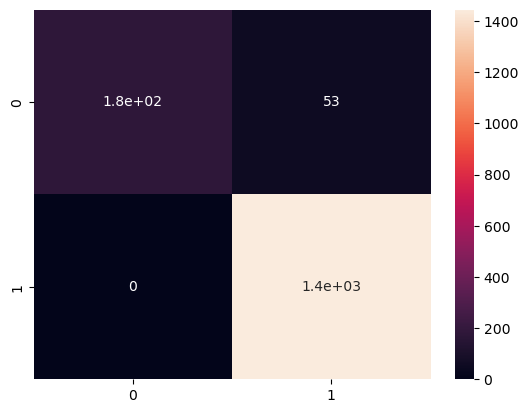

In [59]:
sns.heatmap(cm,annot= True)

In [60]:
import pickle
with open ("Spam Classifier",'wb') as f:
    pickle.dump(model,f)